/tmp/ipython-input-5-4010082333.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(' ', np.nan, inplace=True)


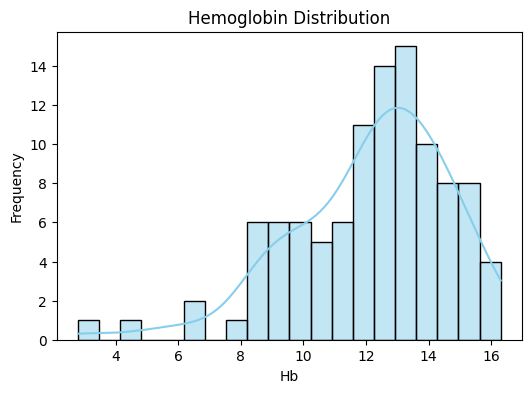

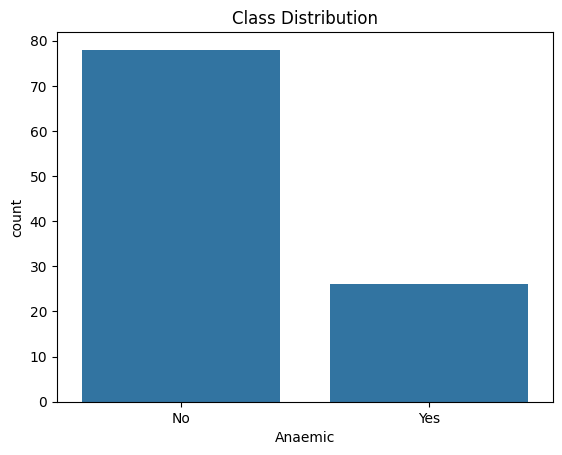

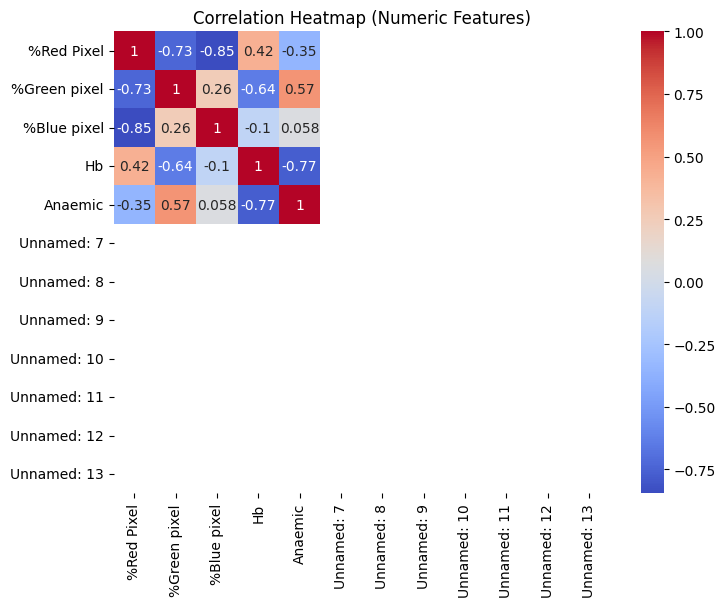

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [5]:
# anemia_prediction_pipeline.py

#  1. Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# 🔹 1. Load Dataset
df = pd.read_csv("anemia_dataset.csv")

# 🔹 2. Clean and Preprocess
df.columns = df.columns.str.strip()
df.replace(' ', np.nan, inplace=True)

# Drop irrelevant columns
df.drop(columns=["Number", "Name"], errors='ignore', inplace=True)

# Encode target variable
le = LabelEncoder()
df['Anaemic'] = le.fit_transform(df['Anaemic'])

# Separate features and target
X = df.drop(columns=['Anaemic'])
y = df['Anaemic']

# Split before imputation (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 3. Handle Missing Values (Numerical Imputation)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

# 📊 4. Exploratory Data Analysis

# Hb distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Hb'], kde=True, bins=20, color='skyblue')
plt.title('Hemoglobin Distribution')
plt.xlabel('Hb')
plt.ylabel('Frequency')
plt.show()

# Class balance
sns.countplot(data=df, x='Anaemic')
plt.title("Class Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 🤖 5. Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Model: {name}")
    print(f"✅ Accuracy: {acc:.2f}")
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

# 🌟 6. Feature Importance
tree_model = models["Gradient Boosting"]
plt.figure(figsize=(6, 4))
feat_imp = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', color='purple')
plt.title("Feature Importance - Gradient Boosting")
plt.tight_layout()
plt.show()

# =============================
# Conclusion
# Decision Tree and Gradient Boosting achieved solid accuracy on this small dataset.
# Hb shows strong predictive power. Future work: try cross-validation, SHAP, or XGBoost.
